In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('HR_capstone_dataset.csv')

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**Source:** [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level|
last_evaluation|Score of employee's last performance review|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

# 1. Exploratory Data Analysis

## Objectif global:
- Creer un modèle capable de prédire si oui ou non un employé va quitter l'entreprise
  
## Objectif :
- Comprendre du mieux possible nos données 
- Développer une premiere stratégie de modélisation 

## Checklist de base
#### Analyse de Forme :
- **variable target** : left
- **lignes et colonnes** : 14999, 10
- **types de variables** : 6 int, 2 float, 2 objects
- **Analyse des valeurs manquantes** : No missing values

#### Analyse de Fond :
- **Visualisation de la target** : 23.8% left, 76.2% still in the company 

    
    
    
- **Signification des variables** :
    - variables continues non standardisées, skewed (asymétriques)
    - variables qualitatives binaires: 'promotion_last_5years' et 'work_accident'
    

- **Relation Variables / Target** :
    - satisfaction_level, last_evaluation, average_monthly_hour, promotion_last_5years (légèrement),number_project, time_spend_company and salary semblent avoir une influence sur la variable target: hypothèse à vérifier.
    
    
    
## Analyse plus détaillée

- **Relation Variables / Variables** :
    - pas de corrélation apparante


- **NaN analyse** : 0 NaN

### hypotheses nulle (H0): 

- H0 : La variable est indépendante de la target 'left' (non rejetée pour 'last_evaluation')
- un t-test nous a permis de voir que cette hypothèse est rejetée pour les variables 'satisfaction_level' et 'average_monthly_hours'
- un test du chi2 nous a permis de voir que cette hypothèse est rejetée pour les variables 'number_project', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Department' and 'salary'



## Analyse de Forme :

In [4]:
df = data.copy()

In [5]:
df.shape

(14999, 10)

In [6]:
df.dtypes.value_counts()

int64      6
float64    2
object     2
dtype: int64

In [7]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident            0.0
left                     0.0
promotion_last_5years    0.0
Department               0.0
salary                   0.0
dtype: float64

## Analyse de Fond :

In [8]:
df['left'].value_counts(normalize=True)

0    0.761917
1    0.238083
Name: left, dtype: float64

In [9]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<Figure size 640x480 with 0 Axes>

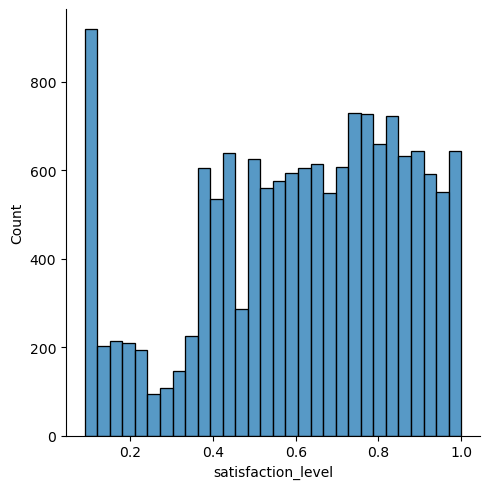

<Figure size 640x480 with 0 Axes>

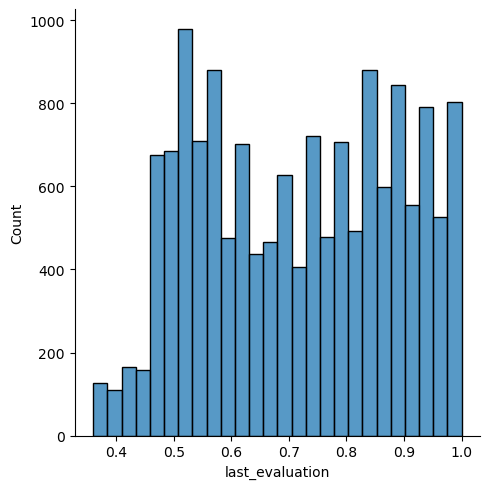

<Figure size 640x480 with 0 Axes>

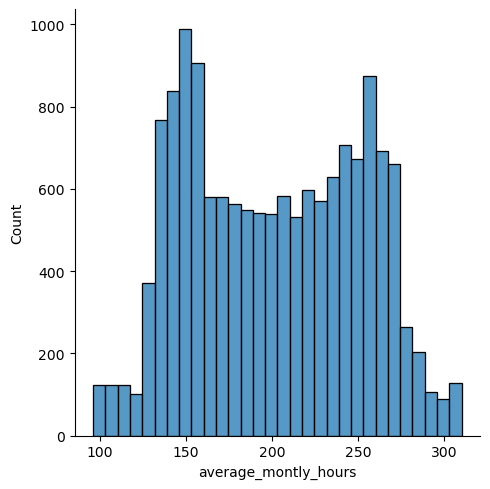

In [11]:
continuous_list = ['satisfaction_level', 'last_evaluation', 'average_montly_hours']
for col in continuous_list:
    plt.figure()
    sns.displot(df[col])

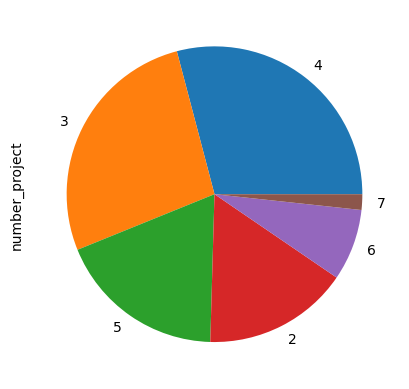

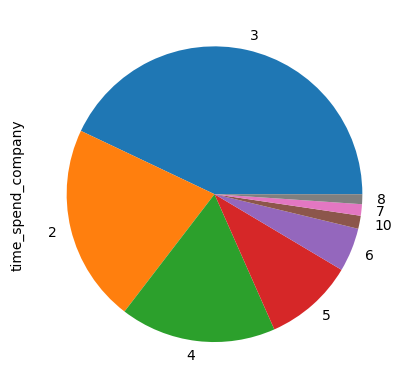

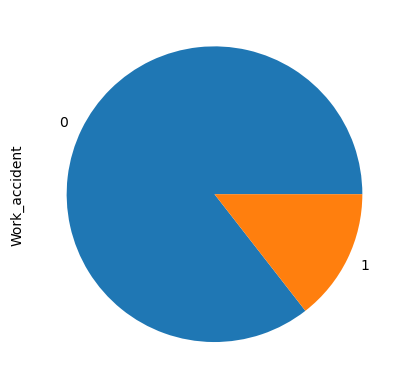

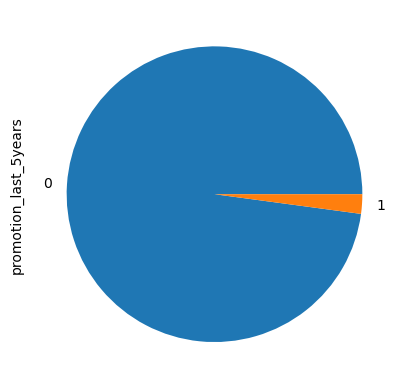

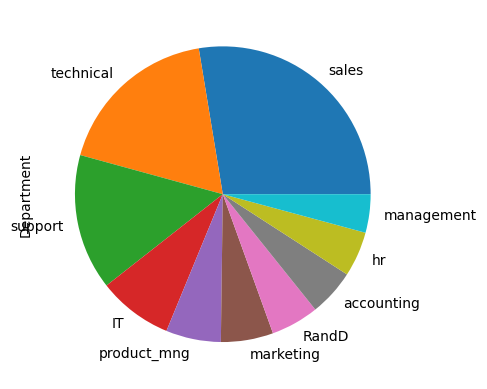

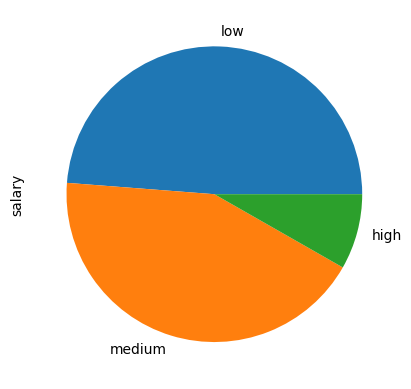

In [38]:
qualitative_list = [x for x in list(df.columns) if x not in continuous_list]
qualitative_list.remove('left')
for col in qualitative_list:
    plt.figure()
    df[col].value_counts().plot.pie()

## Relation Target / Variables
### Création de sous-ensembles positifs et négatifs

In [14]:
positive_df = df[df['left'] == 1]
negative_df = df[df['left'] == 0]

## Target / Continuous

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

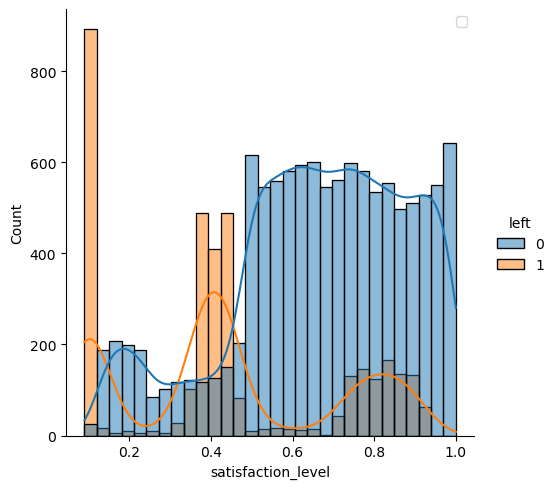

<Figure size 640x480 with 0 Axes>

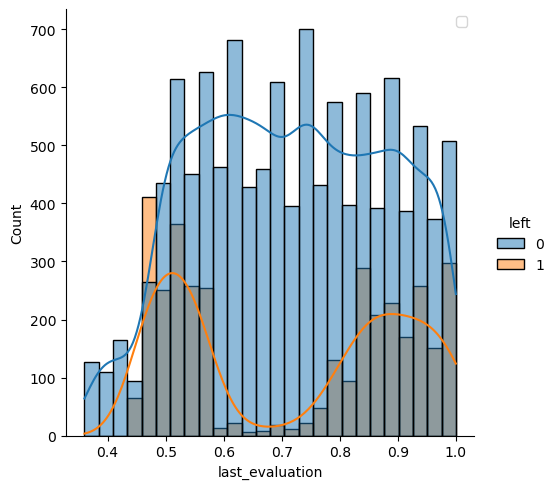

<Figure size 640x480 with 0 Axes>

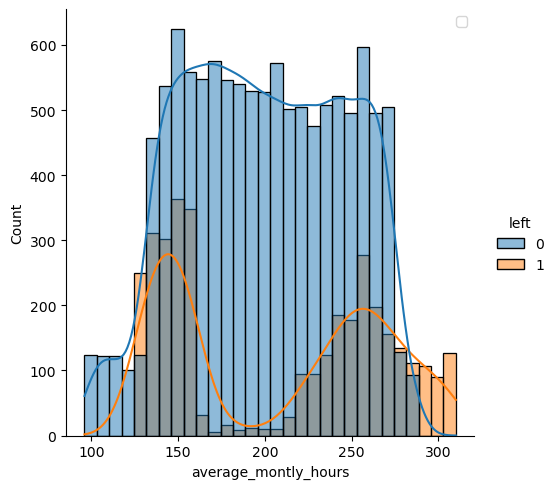

In [20]:
for col in continuous_list:
    plt.figure()
    sns.displot(df, x = col, hue = 'left', kde = True)
    plt.legend()

## Target / Qualitative

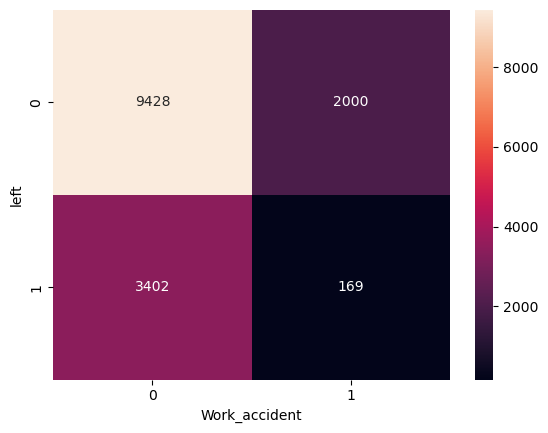

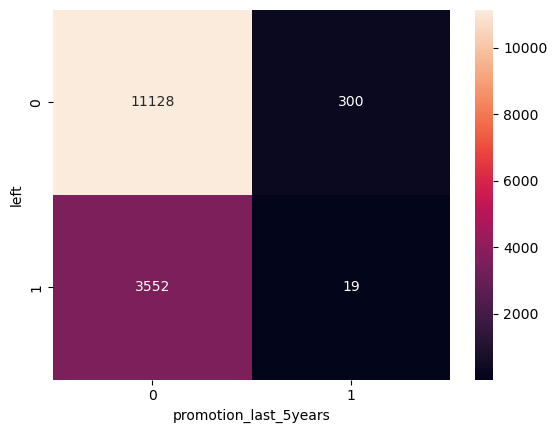

In [23]:
for col in ['Work_accident', 'promotion_last_5years']:
    plt.figure()
    sns.heatmap(pd.crosstab(df['left'], df[col]), annot=True, fmt='d')

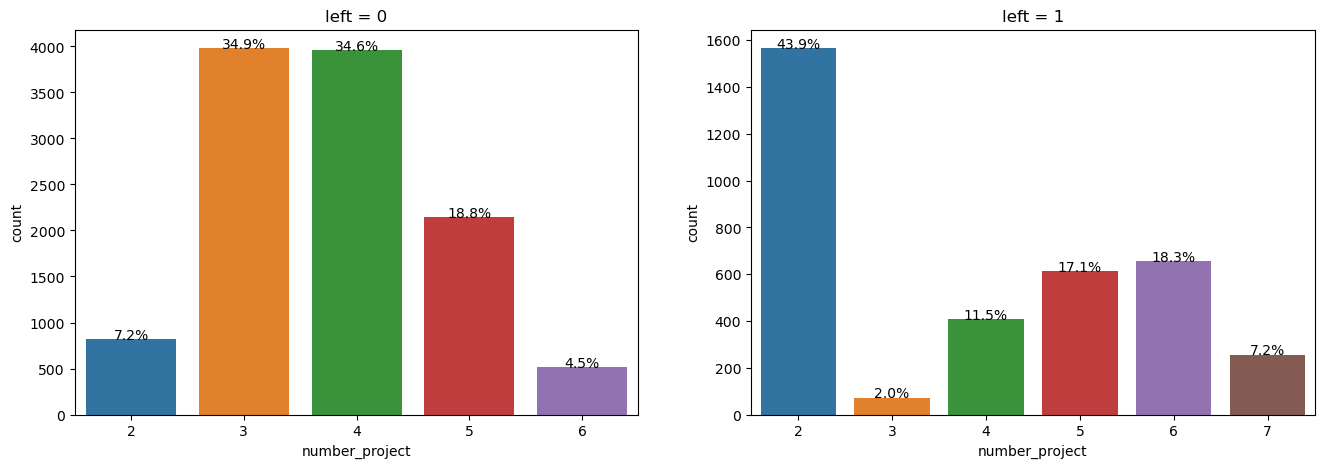

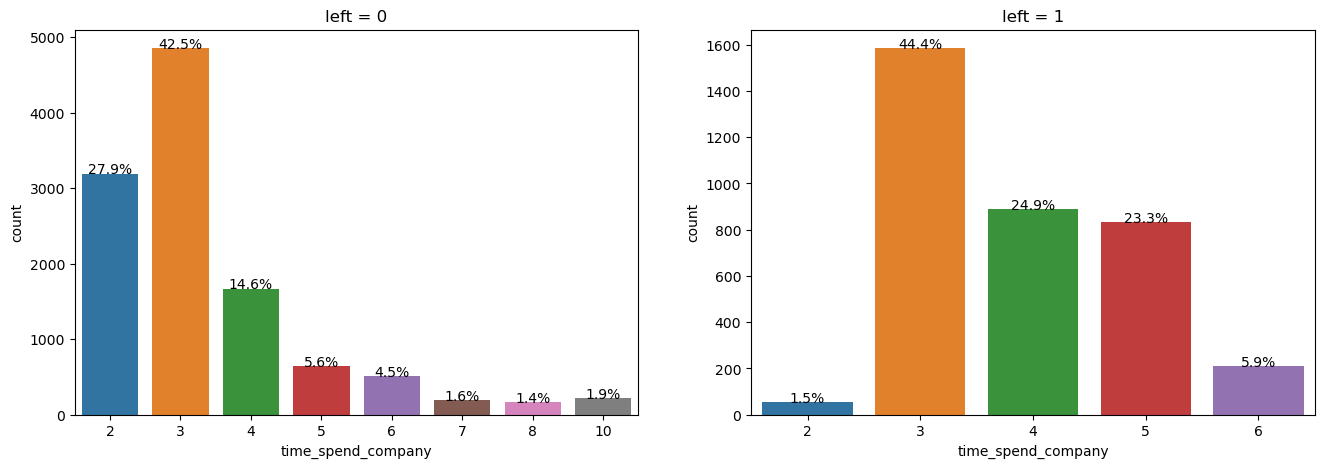

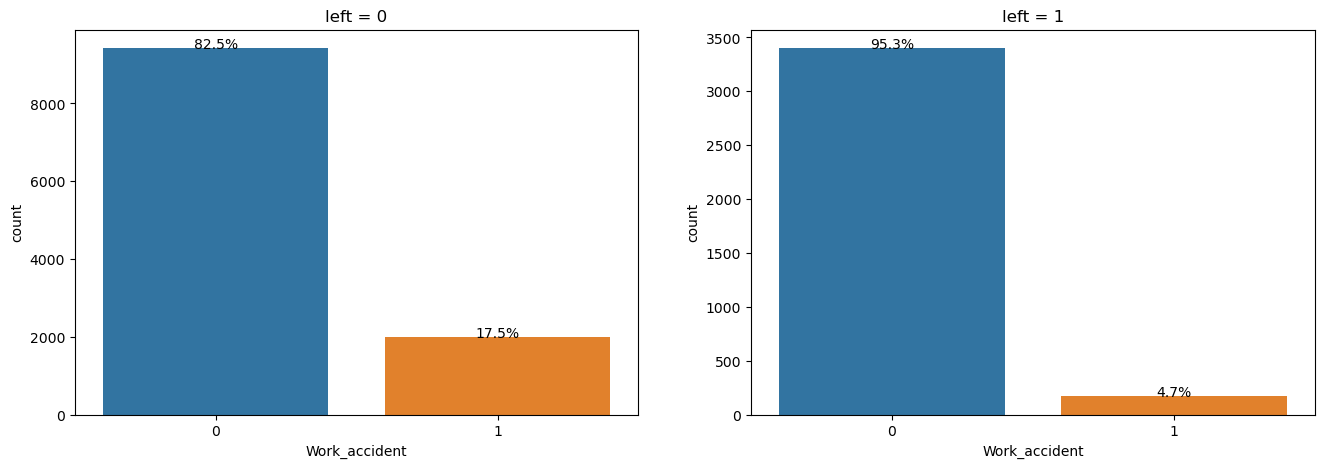

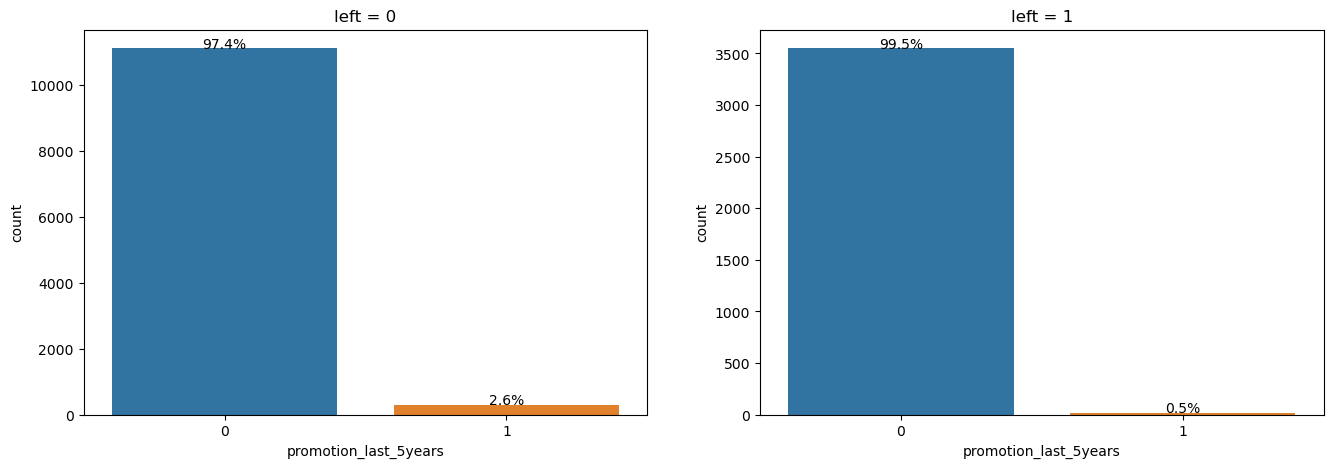

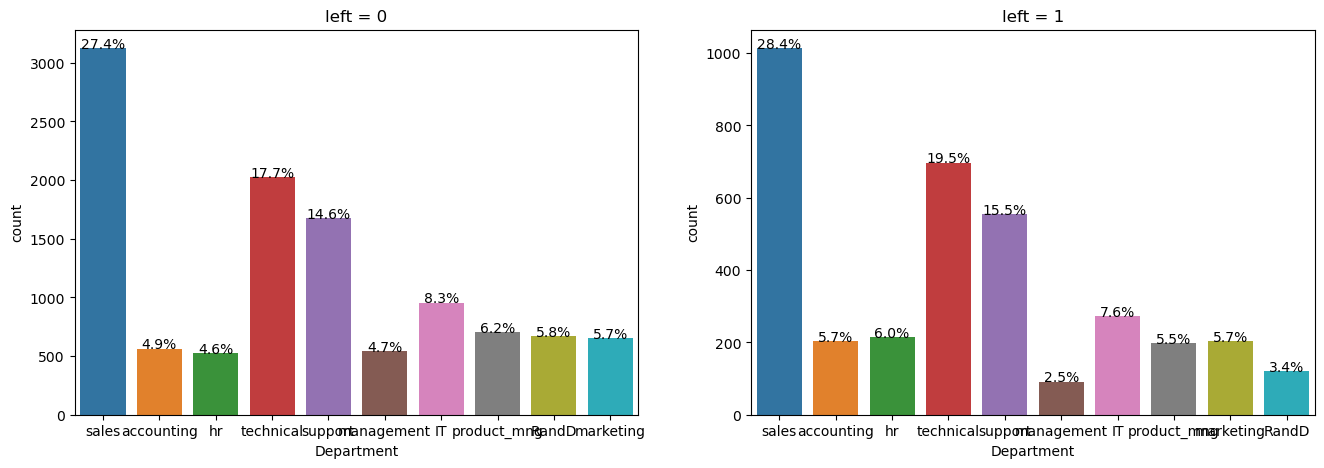

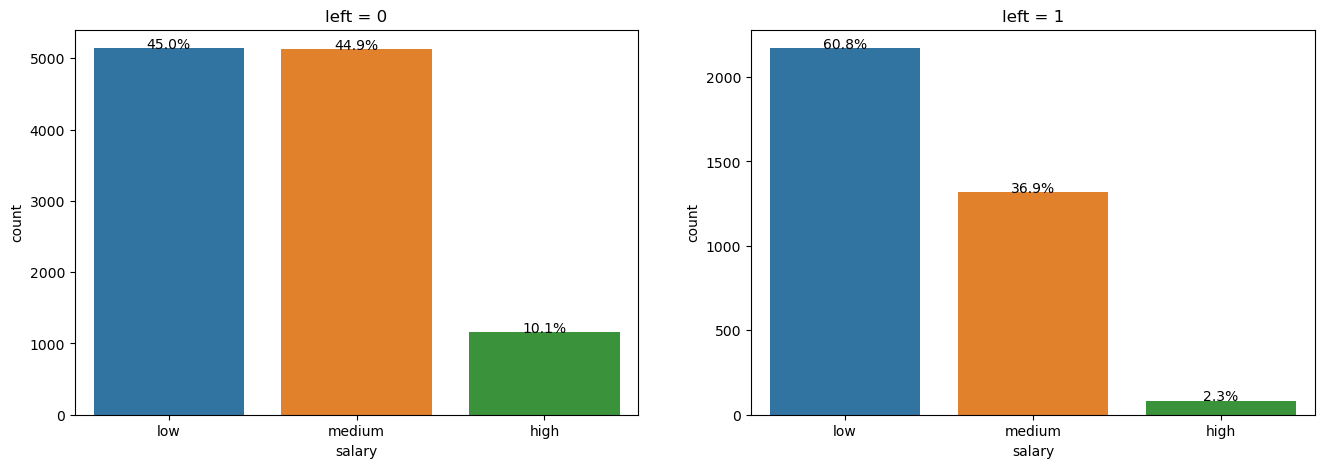

In [40]:
for col in qualitative_list:
    plt.figure(figsize=(16, 5))
    plt.subplot(1, 2, 1)
    ax1 = sns.countplot(data=negative_df, x=col)
    plt.xlabel(col)
    plt.title('left = 0')
    
    # Add percentage labels to the bars in the left = 0 plot
    total = len(negative_df)
    for p in ax1.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax1.annotate(percentage, (x, y), ha='center')
    
    plt.subplot(1, 2, 2)
    ax2 = sns.countplot(data=positive_df, x=col)
    plt.xlabel(col)
    plt.title('left = 1')
    
    # Add percentage labels to the bars in the left = 1 plot
    total = len(positive_df)
    for p in ax2.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax2.annotate(percentage, (x, y), ha='center')
    
    plt.show()

## Analyse un peu plus Avancée
### Relation Variables / Variables

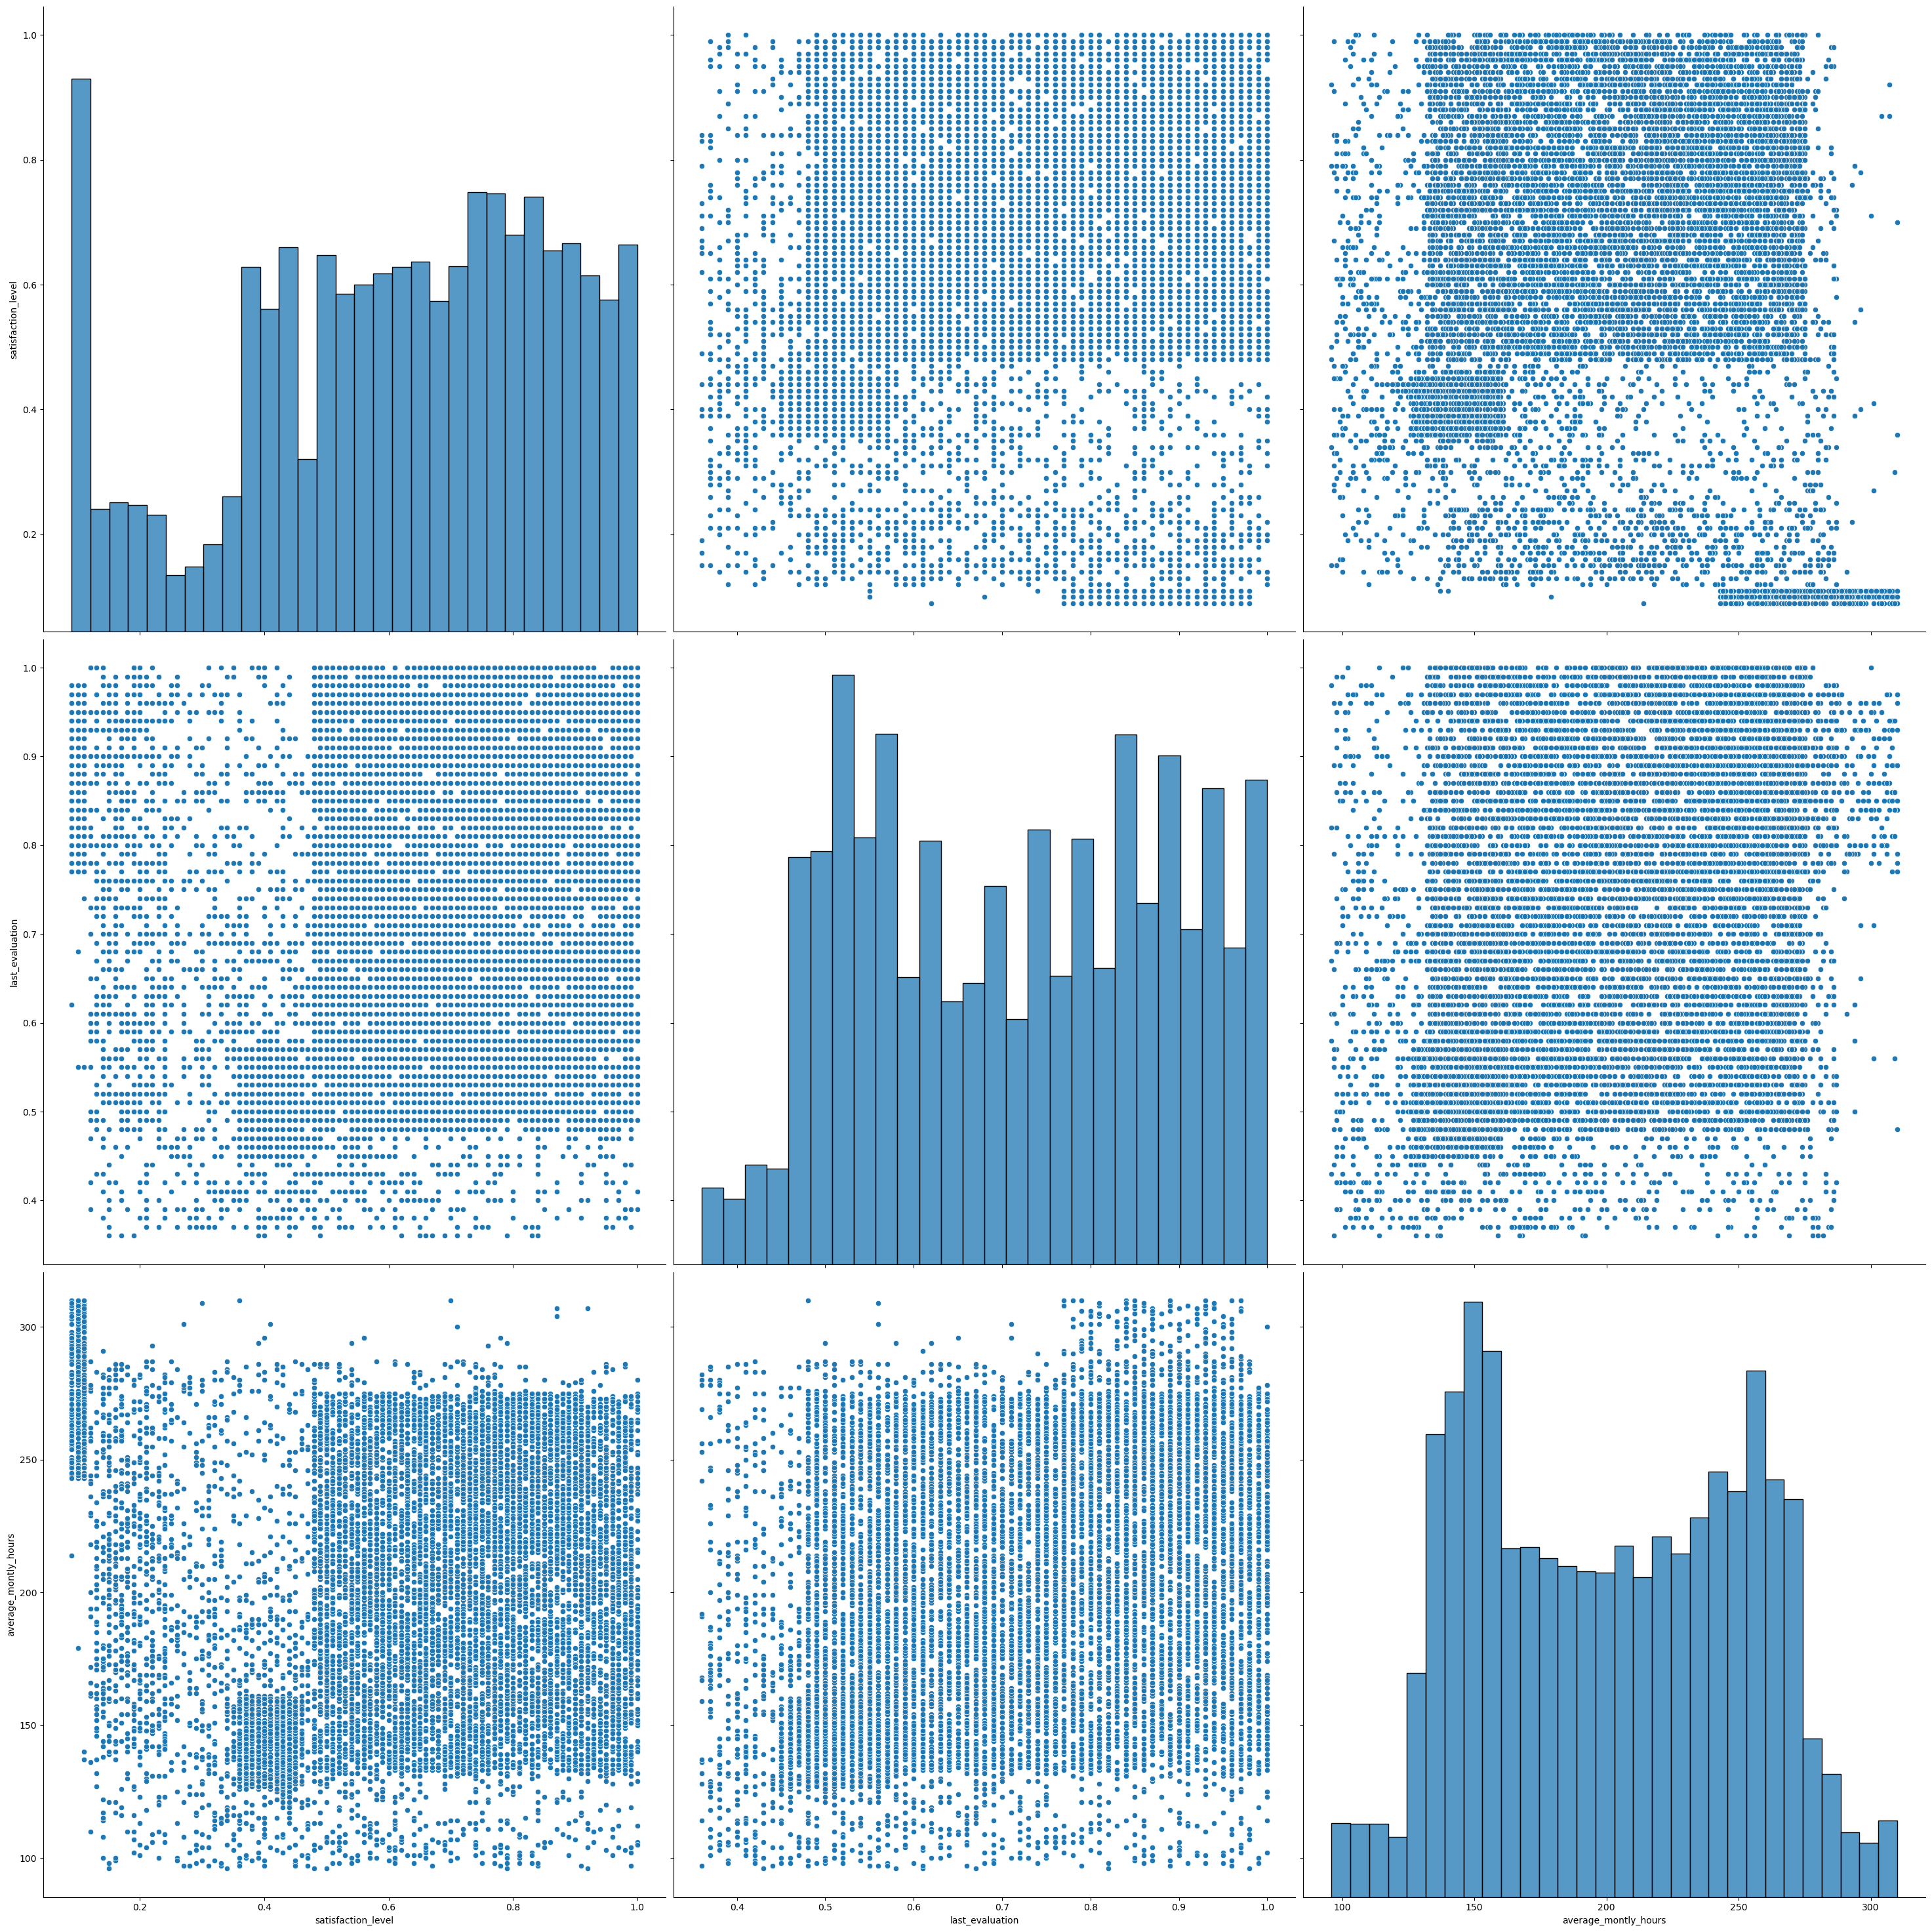

In [45]:
sns.pairplot(df[continuous_list], height=10)

## T-Test

In [46]:
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

In [48]:
def t_test(col):
    alpha = 0.02
    stat, p = ttest_ind(negative_df[col].dropna(), positive_df[col].dropna())
    if p < alpha:
        return 'H0 Rejetée'
    else :
        return 0

In [49]:
for col in continuous_list:
    print(f'{col :-<50} {t_test(col)}')

satisfaction_level-------------------------------- H0 Rejetée
last_evaluation----------------------------------- 0
average_montly_hours------------------------------ H0 Rejetée


In [56]:
def chi2(col):
    alpha = 0.05
    stat, p , freedom, freq = chi2_contingency(pd.crosstab(df[col],df['left']))
    if p < alpha:
        return 'H0 Rejetée'
    else :
        return 0

In [57]:
for col in qualitative_list:
    print(f'{col :-<50} {chi2(col)}')

number_project------------------------------------ H0 Rejetée
time_spend_company-------------------------------- H0 Rejetée
Work_accident------------------------------------- H0 Rejetée
promotion_last_5years----------------------------- H0 Rejetée
Department---------------------------------------- H0 Rejetée
salary-------------------------------------------- H0 Rejetée
